# ML Lab Exam


In [1]:
import random
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import math

Q1

Training Set

In [2]:
train_x = np.random.uniform(low = 0.0, high = 1.0, size = 500)
train_x.sort()
e_train = np.random.normal(loc=0.0, scale=0.15, size=500)
train_y = np.array(np.sin(5*math.pi*train_x) + e_train)

Testing Set

In [3]:
test_x = np.random.uniform(low = 0.0, high = 1.0, size = 50)
test_x.sort()
e_test = np.random.normal(loc=0.0, scale=0.15, size=50)
test_y = np.array(np.sin(5*math.pi*test_x) + e_test)

RBF KERNEL FUNCTION

```a) Estimate the regularized Least Squares Regression using Kernel Regression with Gradient Descent. ```

In [4]:
def kernel_matrix(x,z,sigma):
    A = np.zeros((len(x),len(z)))
    for i in range(len(x)):
        for j in range(len(z)):
            A[i][j] = np.exp((-1)*(np.linalg.norm(x[i]-z[j])**2) / (2*(sigma**2)))
    A = np.vstack((A,np.ones(len(z))))
    return A.T

In [5]:
def tuner(train_x,train_y):
    lamb = [2**i for i in range(-7,8)]
    sigma = [0.01,0.1,1,2,0.2]
    alpha = 0.000001
    record = []
    for s in sigma:
        A = kernel_matrix(train_x,train_x,s)
        for l in lamb:
            W = np.zeros(len(A[1]))
            for i in range(20000):
                m = l*W - np.dot(A.T,(train_y - np.dot(A,W)))
                W = W - alpha*m
            y_pred = A @ W
            RMSE = (sum((train_y - y_pred)**2) / len(train_y))**0.5
            record.append((RMSE,l,s))
    
    min_RMSE = 99999
    index = 0
    for i in range(len(record)):
        if record[i][0] < min_RMSE:
            min_RMSE = record[i][0]
            index = i
    return record[index]

In [6]:
def find_RMSE(y,y_pred):
    return (sum((y - y_pred)**2) / len(y))**0.5

In [7]:
def plot_graph(test_X,test_Y,predicted_Y):
    plt.scatter(test_X,test_Y,label = "Test Points")
    x = np.linspace(0, 1, 10000)
    y = np.sin(5*math.pi*x)
    plt.plot(x, y,label = "Actual Curve")
    plt.plot(test_X,predicted_Y, label = "Predicted Curve",color = 'red')
    plt.legend()
    plt.grid()
    plt.show()

In [8]:
def gradient_kernel_regression(train_x,train_y,test_x,test_y):
    xt = train_x[:50]
    yt = train_y[:50]

    tuned_value = tuner(xt,yt)
    best_rmse,sigma,lamb = tuned_value
    
    A = kernel_matrix(train_x,train_x,sigma)
    W = np.zeros(len(A[1]))
    for i in range(10000):
        m = lamb*W - np.dot(A.T,(train_y - np.dot(A,W)))
        W = W - 0.00001*m
    test_A = kernel_matrix(train_x,test_x,sigma)
    train_y_pred = A @ W
    test_y_pred = test_A @ W
    train_RMSE = find_RMSE(train_y,train_y_pred)
    test_RMSE = find_RMSE(test_y,test_y_pred)

    print(f'Train RMSE : {train_RMSE}')
    print(f'Test RMSE : {test_RMSE}')
    plot_graph(test_x,test_y,test_y_pred)

Train RMSE : 0.1456074326871933
Test RMSE : 0.19674423745263298


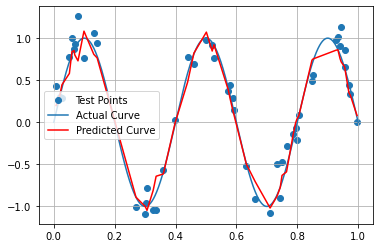

In [9]:
gradient_kernel_regression(train_x,train_y,test_x,test_y)

```b) Modify the training set T by randomly picking up 5 data points from the training set T and scaling their yi values by 20. Estimate the Least Squares Estimate using Gradient Descent and state your observations.```

In [10]:
random_index = np.random.randint(0,500,5)
new_train_y = train_y
new_train_y[random_index] *= 20

Train RMSE : 1.5274739376689572
Test RMSE : 0.4105261265936689


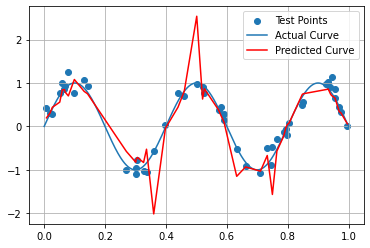

In [11]:
gradient_kernel_regression(train_x,new_train_y,test_x,test_y)

```c) Modify the optimization problem of the least squares regression model to improve the RMSE results on test data. Further, solve your modified optimization problem using Gradient Descent and calculate the percentage of improvement obtained by your model over the existing least square regression model.```

Q2

Bayesian Decision Boundary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and covariance matrices for the two datasets
mu1 = np.array([-1, 1])
mu2 = np.array([2, 2])
sigma1 = np.array([[2, 0], [0, 2]])
sigma2 = np.array([[2, 0], [0, 2]])

# Generate dataset A and B
np.random.seed(1)  # set random seed for reproducibility
A = np.random.multivariate_normal(mu1, sigma1, 2000)
B = np.random.multivariate_normal(mu2, sigma2, 2000)

# Split datasets A and B into training and testing sets
A_train, A_test = A[:1750], A[1750:]
B_train, B_test = B[:1750], B[1750:]
if len(A) == len(B):
    P_w1 = 0.5
    P_w2 = 0.5
    
# Compute the optimal Bayesian decision boundary
w = mu1 - mu2
w0 = (0.5 *(mu1 + mu2)) - ((sigma1[0][0]/ np.linalg.norm(mu1 - mu2)) * (np.log(P_w1/P_w2)) *(mu1 - mu2))
x1 = np.linspace(-2, 2, 100)
x2 = (w.T@w0 - w[0]*x1) / w[1]

# Plot the datasets and decision boundary
plt.scatter(A_train[:, 0], A_train[:, 1], label='A train')
plt.scatter(B_train[:, 0], B_train[:, 1], label='B train')
plt.plot(x1, x2, color='k', label='Bayesian decision boundary')
plt.legend()
plt.show()

Logestic Regression Model using Gradient Descent Method

SVM Model Gradient Descent Method